In [142]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [143]:
df = gpd.read_file('data/points_for_map.geojson')
nombres= df.nombre.unique()
df.crs = 'epsg:4326'

In [144]:
place_geo = gpd.read_file('data/places.geojson')


In [145]:
sample_places = pd.read_csv('s3://opi-data-science/play/pepe/Ubicación de equipos RMX - Hoja 1.csv')
sample_places =(sample_places
 .assign(nombre= lambda x: x.zona + ', ' + x.equipo + ', ' + x.parque)
 .set_index('nombre')
 .coordenadas.str.split(',', expand = True)
.rename(columns = {0:'latitud', 1:'longitud'})
 .assign(longitud= lambda x: x.longitud.astype(float),
        latitud= lambda x: x.latitud.astype(float))
)

sample_places['geometry']= gpd.points_from_xy(sample_places['longitud'], sample_places['latitud'])
sample_places = gpd.GeoDataFrame(sample_places)
sample_places = sample_places.set_crs(4326).to_crs(epsg=3857)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


KeyboardInterrupt: 

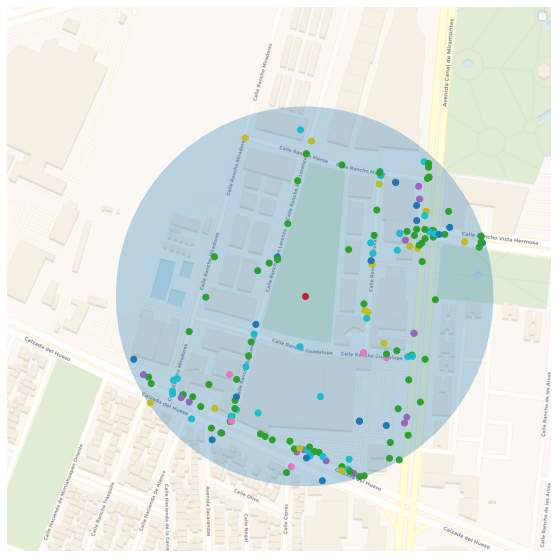

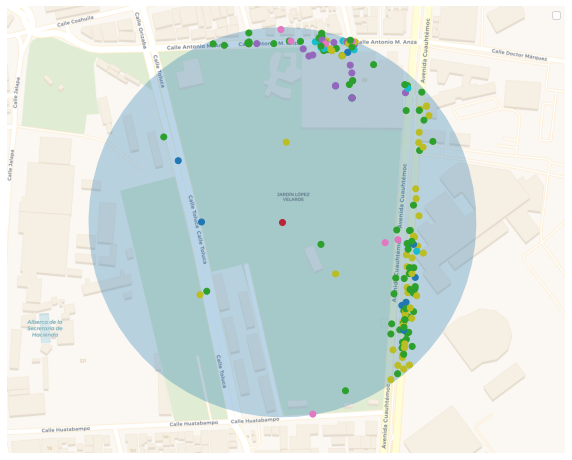

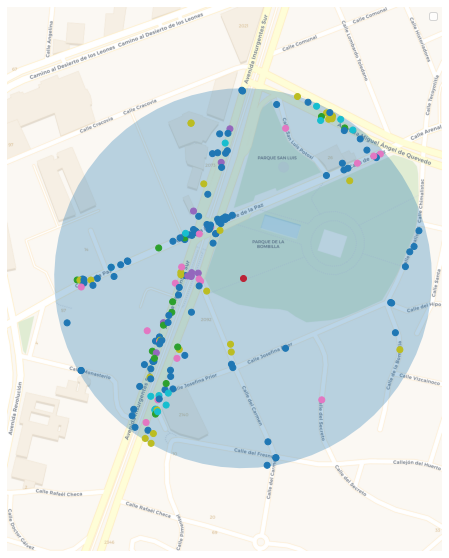

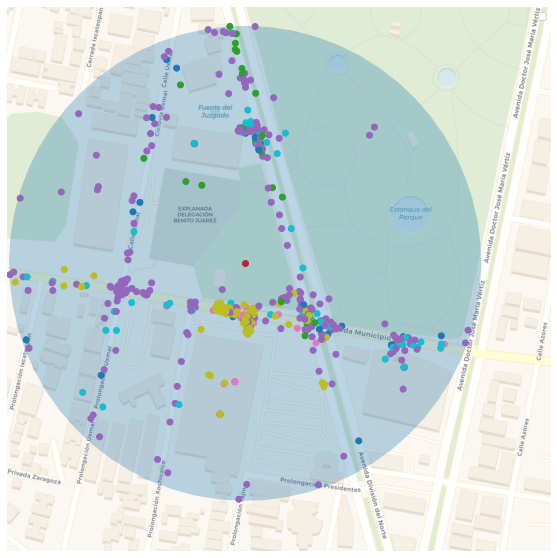

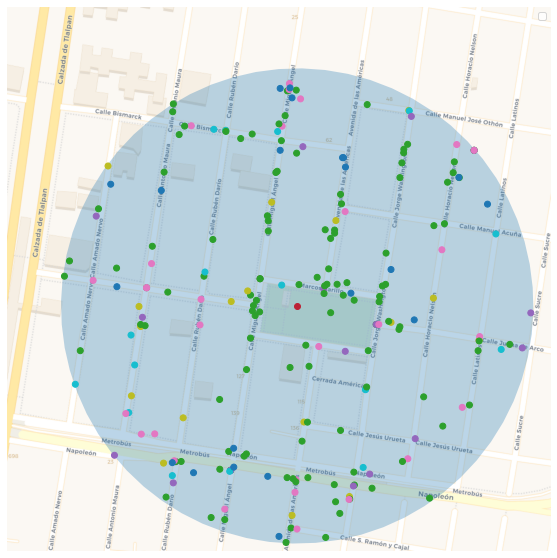

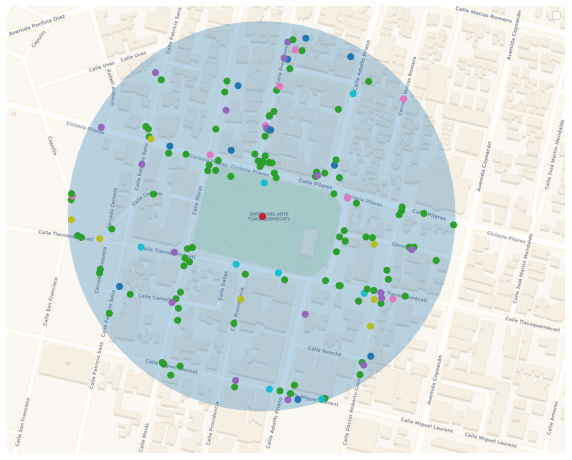

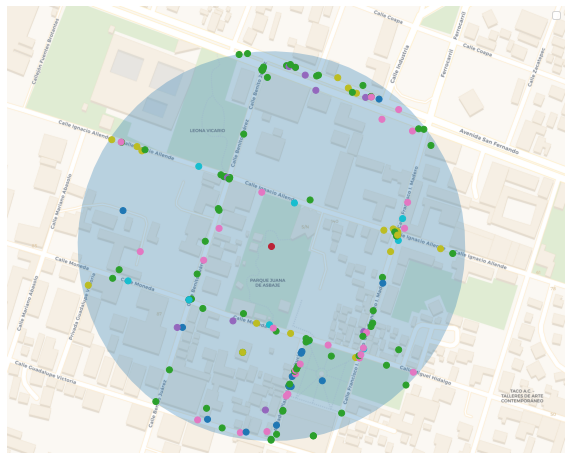

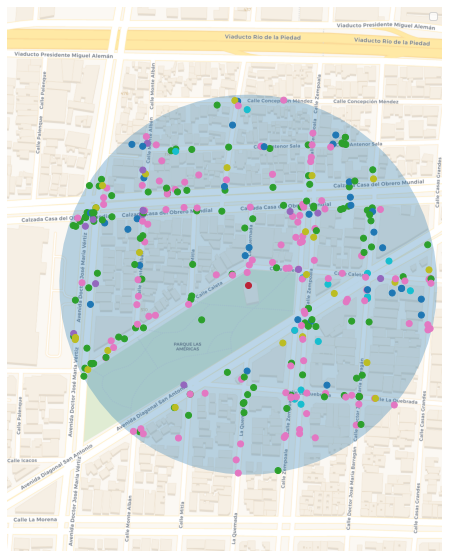

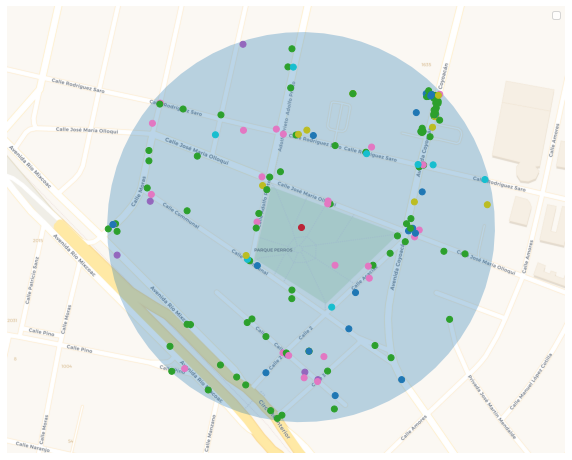

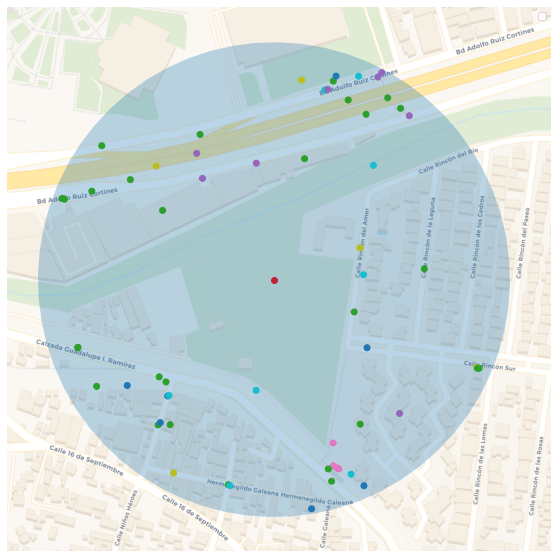

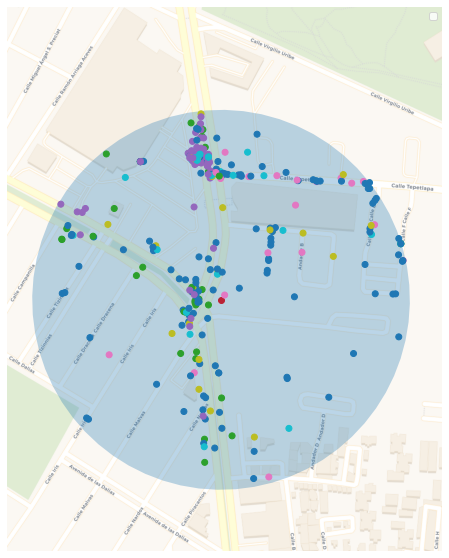

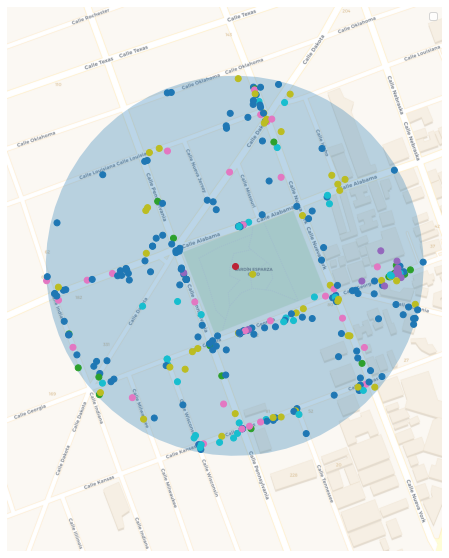

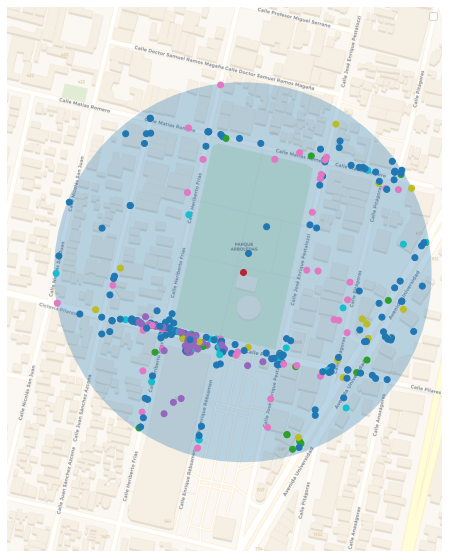

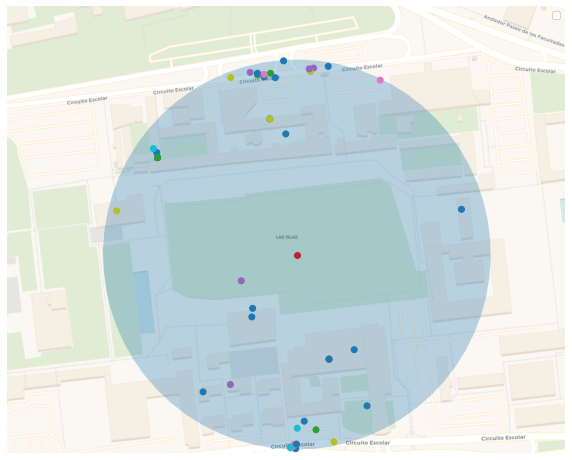

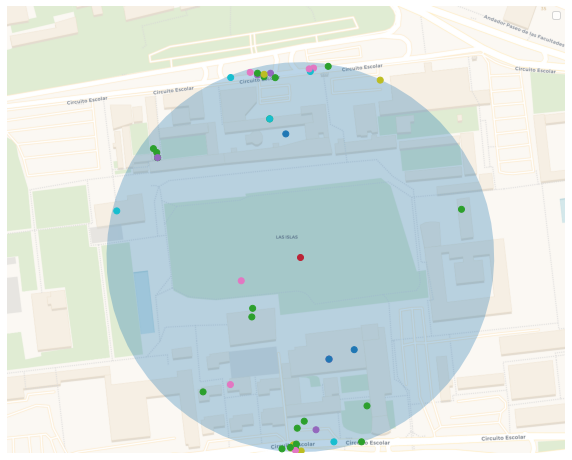

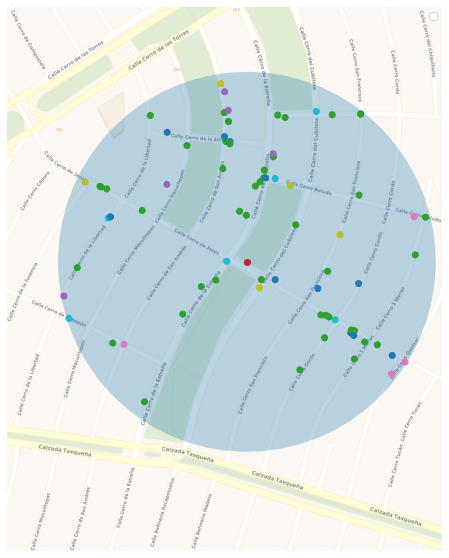

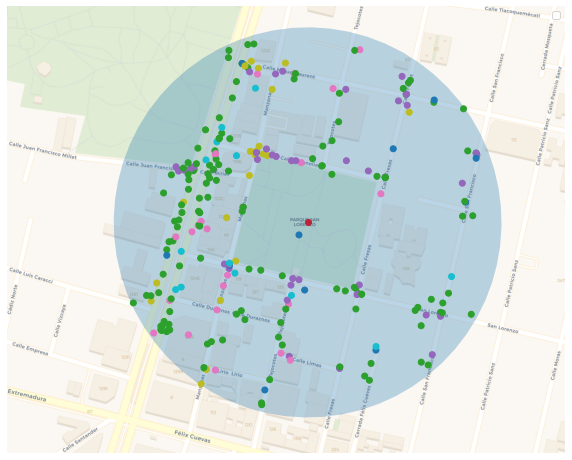

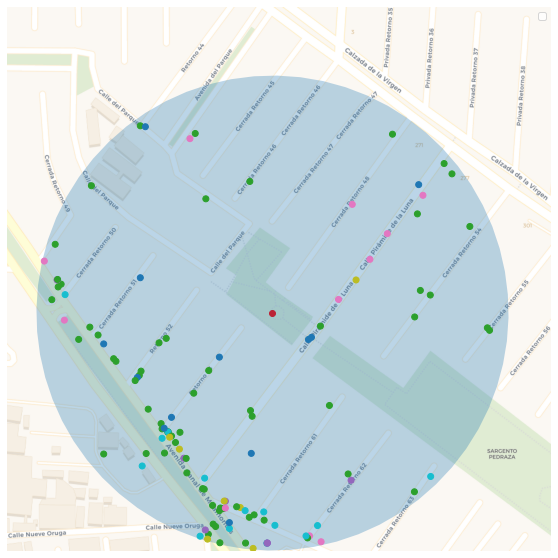

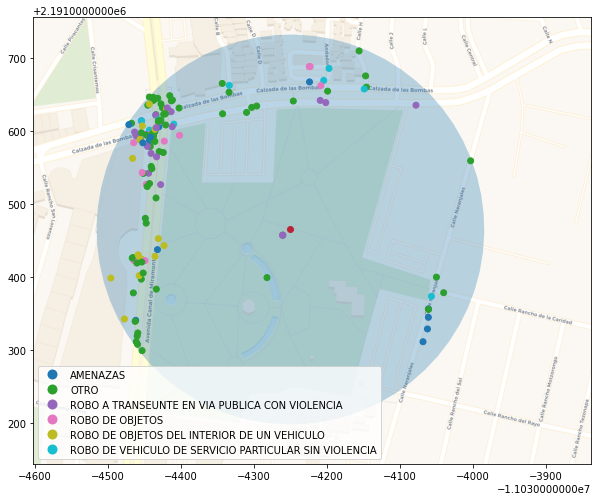

In [165]:
for place in nombres: 
    save_name = place.replace(' ', '').replace(',', '_').replace("'", '')
    circulo = place_geo.query(f'nombre == "{place}"')
    circulo= circulo.to_crs(epsg=3857)
    fig, ax = plt.subplots(figsize = (10, 10))

    plt.scatter(sample_places.loc[place].geometry.x,
            sample_places.loc[place].geometry.y, color = 'red')
    ghent_img, ghent_ext = cx.bounds2img(circulo.bounds.values[[0]][0][0],
                                     circulo.bounds.values[[0]][0][1],
                                     circulo.bounds.values[[0]][0][2],
                                     circulo.bounds.values[[0]][0][3],
                                     ll=False,
                                     source=cx.providers.CartoDB.Voyager
                                    )

    circulo = circulo.to_crs(epsg=3857)
    circulo.plot(ax = ax, alpha = 0.3)



    ax.imshow(ghent_img, extent=ghent_ext)
    df_place.crs = 'epsg:4326'

    df_place= df.query(f'nombre == "{place}"')
    df_place = df_place.to_crs(epsg=3857)

    top_delitos = df_place.delito.value_counts().head(5).index
    mapa_top =dict([(d, d) for d in top_delitos])
    df_place= df_place.assign(delito = lambda x:x.delito.map(mapa_top).fillna('OTRO'))
    df_place.plot('delito', ax = ax, legend =True)

    df_place= df.query(f'nombre == "{place}"')
    plt.axis('off')
    plt.legend(ncol=2)

    #plt.show()
    plt.savefig(f'data/figures/{save_name}/map.png')